# Lecture 13 - Dimensionality Reduction

***
##### CS 434 - Data Mining and Machine Learning
##### Oregon State University-Cascades
***

## <img src="https://img.icons8.com/color/32/000000/fork-lift.png"/> Load packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
from IPython.display import Image
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA

## <img src="https://img.icons8.com/color/32/000000/accept-database.png"/> Load dataset

In [0]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### <img src="https://img.icons8.com/color/32/000000/hashtag-activity-feed-2.png"/>  Get attributes and class labels

In [0]:
# split train and test
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

### <img src="https://img.icons8.com/color/32/000000/123.png"/> Encode labels

In [0]:
# encode class labels
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### <img src="https://img.icons8.com/color/32/000000/split-files.png"/> Split into train and test sets

In [0]:
# split train and test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)
    
print('Label counts in y:', np.bincount(y))
print('Label counts in y_train:', np.bincount(y_train))
print('Label counts in y_test:', np.bincount(y_test))        

Label counts in y: [59 71 48]
Label counts in y_train: [41 50 33]
Label counts in y_test: [18 21 15]


# <img src="https://img.icons8.com/color/32/000000/p.png"/> <img src="https://img.icons8.com/color/32/000000/c.png"/> <img src="https://img.icons8.com/color/32/000000/a.png"/> Principle Component Analysis

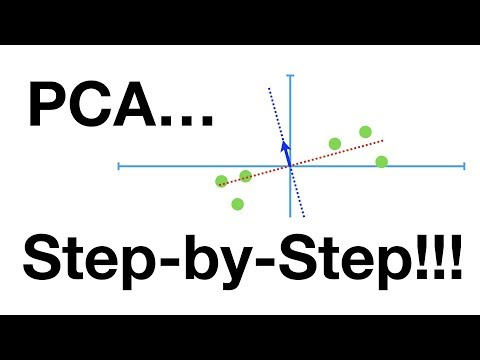

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('FgakZw6K1QQ')

**Principle Component Analysis** (PCA) aims to find the directions of maximum variance in high-dimensional data and projects the data onto a new subspace with equal or few dimensions than the original one. 

The orthogonal axes (the principla components) of the new subspace can be interpreted as the directions of maximum variance given the constrain that the new feature axes are orthogonal to each other. 

![alt text](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch05/images/05_01.png?raw=true)

Suppose we have feature vector $\mathbf{x}$

$$ \mathbf{x} = [x_1, x_2, \ldots, x_d ], \;\; \mathbf{x} \in {\rm I\!R}^d$$

which is then transformed by a transformation matrix, $\mathbf{W} \in {\rm I\!R}^{d \times k}$

$$\mathbf{xW} = \mathbf{z}$$

resulting in the output vector

$$\mathbf{z} = [z_1, z_2, \ldots, z_k], \;; \mathbf{z} \in {\rm I\!R}^k$$

Typically $k << d$. The first principle component will have the largest possible variance.


## <img src="https://img.icons8.com/color/32/000000/overview-pages-2.png"/> Overview of PCA

### <img src="https://img.icons8.com/color/32/000000/todo-list.png"/> Steps of PCA algorithm

<img src="https://img.icons8.com/color/24/000000/1.png"/> Standardize the data.

<img src="https://img.icons8.com/color/24/000000/2.png"/> Construct the covariance matrix.

<img src="https://img.icons8.com/color/24/000000/3.png"/> Obtain the eigenvalues and eigenvectors of the covariance matrix.

<img src="https://img.icons8.com/color/24/000000/4.png"/> Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.

<img src="https://img.icons8.com/color/24/000000/5.png"/> Select the $k$ eigenvectors, which correspond to the $k$ largest eigenvalues, where $k$ is the dimensionality of the new feature subspace ($k \le d$). 

<img src="https://img.icons8.com/color/24/000000/6.png"/> Construct the project matrix, $\mathbf{W}$, from the "top" $k$ eigenvectors.

<img src="https://img.icons8.com/color/24/000000/7.png"/> Transform the $d$-dimensional input dataset $\textbf{X}$ using the projection matrix, $\textbf{W}$, to obtain the new $k$-dimensional feature subspace. 

### <img src="https://img.icons8.com/color/32/000000/split-table.png"/> Eigendecomposition

The covariance between two features $x_j$ and $x_k$ can be calculated as

$$ \sigma_{jk} = {1 \over {n-1}} \sum_{i-1}^n (x_j^i - \mu_j) (x_k^i - \mu_k)$$

where $\mu_j$ and $\mu_k$ are the sample means of features $j$ and $k$ respectively.

The covariance matrix $\Sigma$ can be written as

$$\Sigma = \begin{bmatrix}
\sigma_1^2 & \sigma_{12} & \sigma_{13} \\
\sigma_{21}  & \sigma_2^2 & \sigma_{23} \\
\sigma_{31} & \sigma_{32} & \sigma_{3}^2  \\
\end{bmatrix}$$

The eigenvectors of the covariance matrix represent the principle components (the directions of maximum variance).

The eigenvalues define the magnitudes of the maximum variance.

A positive covariance between two features indicates that the features increase or decrease together, whereas a negative covariance indicates that the features vary in opposite directions.

Obtain the eigenpairs of the covariance matrix

$$\mathbf{\Sigma v} = \mathbf{\lambda v}$$


where $\lambda$ is a scalar (the eigenvalue). 

## <img src="https://img.icons8.com/color/32/000000/1.png"/> Standardize the data

In [0]:
# standardize X_train and X_test
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## <img src="https://img.icons8.com/color/32/000000/2.png"/> Construct the covariance matrix

In [0]:
# build covariance matrix
cov_mat = np.cov(X_train_std.T)

## <img src="https://img.icons8.com/color/32/000000/3.png"/> Eigendecomposition of the covariance matrix

In [0]:
# eigendecomposition
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.8427 2.416  1.5485 0.9612 0.8417 0.6621 0.5183 0.3465 0.3131 0.1075
 0.2136 0.1536 0.1809]


##### <img src="https://img.icons8.com/color/32/000000/api.png"/> Note: `numpy` eigenvectors

Note the above use of [`numpy.linalg.eig`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) function to decompose the symmetric covariance matrix into its eigenvalues and eigenvectors.
    <pre>>>> eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)</pre>

This is not necessarily a "mistake," but it is perhaps suboptimal. It would be better to use [`numpy.linalg.eigh`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html) in such cases, which has been designed for [Hermetian matrices](https://en.wikipedia.org/wiki/Hermitian_matrix). The latter always returns real  eigenvalues; whereas the numerically less stable `np.linalg.eig` can decompose nonsymmetric square matrices, you may find that it returns complex eigenvalues in certain cases.

## <img src="https://img.icons8.com/color/32/000000/change.png"/> Total and explained variance

Explained variance ratio = ${\lambda_j \over {\sum_{j=1}^d \lambda_j}}$

In [0]:
# calculate sum of explained variance
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

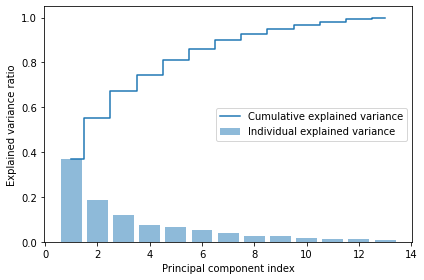

In [0]:
# plot variance (sorted)
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

> This plot shows that the first principle component alone accounts for approximately $40\%$ of the variance.

## <img src="https://img.icons8.com/color/32/000000/4.png"/> Sort the eigenvalues by decreasing order

In [0]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

## <img src="https://img.icons8.com/color/32/000000/5.png"/> Select the $k$ eigenvectors

In the next section we select $k=2$, corresponding to the top two eigenvectors.

## <img src="https://img.icons8.com/color/32/000000/6.png"/> Construct project matrix $\mathbf{W}$

In [0]:
# build W from top two eigenvectors
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1372  0.503 ]
 [ 0.2472  0.1649]
 [-0.0255  0.2446]
 [ 0.2069 -0.1135]
 [-0.1544  0.2897]
 [-0.3938  0.0508]
 [-0.4174 -0.0229]
 [ 0.3057  0.0905]
 [-0.3067  0.0084]
 [ 0.0755  0.5498]
 [-0.3261 -0.2072]
 [-0.3686 -0.249 ]
 [-0.2967  0.3802]]


###### **Note**

Depending on which version of NumPy and LAPACK you are using, you may obtain the Matrix W with its signs flipped. Please note that this is not an issue: If $v$ is an eigenvector of a matrix $\Sigma$, we have

$$\Sigma v = \lambda v,$$

where $\lambda$ is our eigenvalue,


then $-v$ is also an eigenvector that has the same eigenvalue, since
$$\Sigma \cdot (-v) = -\Sigma v = -\lambda v = \lambda \cdot (-v).$$

## <img src="https://img.icons8.com/color/32/000000/7.png"/> Transform dataset $\textbf{X}$ using $\textbf{W}$

Transform $\textbf{X}$  onto the PCA subspace (two components) to obtain $\texttt{X'}$

$$ \texttt{X'} = \texttt{XW} $$

In [0]:
# transform one example with principle components 1 and 2
X_train_std[0].dot(w)

array([2.383 , 0.4546])

In [0]:
# transform entire dataset
X_train_pca = X_train_std.dot(w)

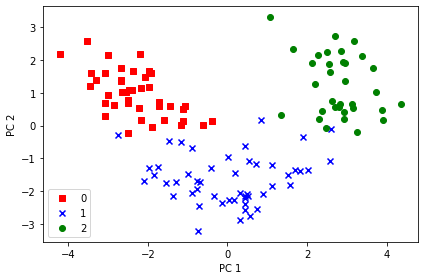

In [0]:
# visualize the dataset
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# <img src="https://img.icons8.com/color/32/000000/negative-dynamic.png"/>  PCA implementation in `sklearn`

## <img src="https://img.icons8.com/color/32/000000/replicate-rows.png"/> Replicate results using `sklearn`

In [0]:
# run PCA on our data
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.3695, 0.1843, 0.1182, 0.0733, 0.0642, 0.0505, 0.0395, 0.0264,
       0.0239, 0.0163, 0.0138, 0.0117, 0.0082])

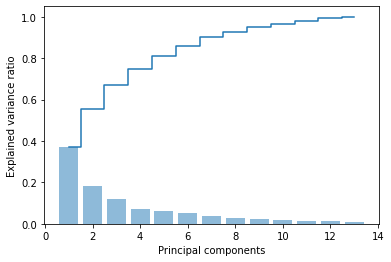

In [0]:
# plot variance (sorted)
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

> We confirm the `sklearn` PCA components match those we calculated manually.

In [0]:
# fit with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

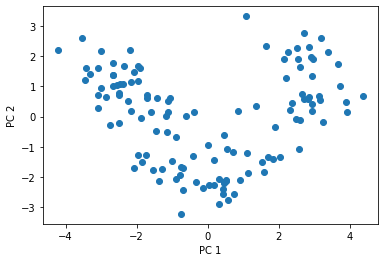

In [0]:
# plot component 1 vs component 2
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

> Observe that these two components alone capture a lot of the variance.

## <img src="https://img.icons8.com/color/32/000000/graph.png"/>  Plot decision regions

In [0]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

## <img src="https://img.icons8.com/color/32/000000/test-tube.png"/> PCA in `sklearn`

Training logistic regression classifier using the first 2 principal components.

In [0]:
# perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [0]:
# train a logistic regressor
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_train)

##### Train set

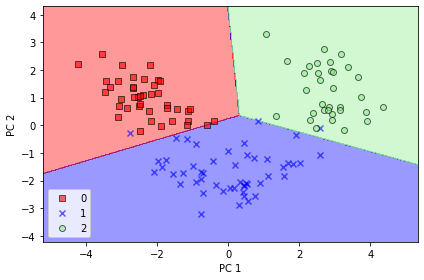

In [0]:
# plot decision regions (train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

##### Test set

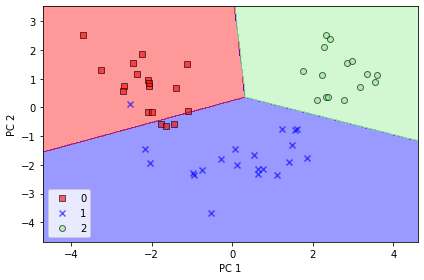

In [0]:
# plot decision regions (test)
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### <img src="https://img.icons8.com/color/32/000000/training.png"/> Explained variance

We can find the explained variance for all components with `n_components=None`. Then we can query the explained variance for each.  This might better inform our cut-off point.

In [0]:
# find explained variance
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.3695, 0.1843, 0.1182, 0.0733, 0.0642, 0.0505, 0.0395, 0.0264,
       0.0239, 0.0163, 0.0138, 0.0117, 0.0082])

# <img src="https://img.icons8.com/color/32/000000/l.png"/> <img src="https://img.icons8.com/color/32/000000/d.png"/> <img src="https://img.icons8.com/color/32/000000/a.png"/> Linear discriminant analysis (LDA)

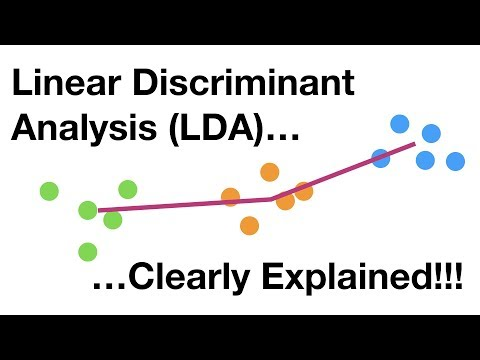

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('azXCzI57Yfc')

##  <img src="https://img.icons8.com/color/32/000000/wrestling.png"/> PCA vs LDA

PCA and LDA are both linear transformation techniques that can be used to reduce the number of dimensions in a dataset. 

* PCA is unsupervised
* LDA is supervised

LDA assumes:
*  data is normally distributed
*  classes have identical covariance matrices
* training examples are statistically independent of each other

## Overview of LDA

![alt text](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch05/images/05_06.png?raw=true)

> $LD1$ would seperate the two normally distributed classes well.
>
> $LD2$ captues a lot of the variance in the dataset, but would fail as a good linear discriminant since it does not capture any of the class-discrimination. 

# LDA walkthrough

## <img src="https://img.icons8.com/color/32/000000/todo-list.png"/> Steps of LDA

<img src="https://img.icons8.com/color/24/000000/1.png"/> Standardize the $d$-dimensional dataset ($d$ is the number of features).

<img src="https://img.icons8.com/color/24/000000/2.png"/> For each class, compute the $d$-dimensional mean vector.

<img src="https://img.icons8.com/color/24/000000/3.png"/> Construct the between-class scatter matrix, $S_B$, and the within-class scatter matrix, $S_W$.

<img src="https://img.icons8.com/color/24/000000/4.png"/> Compute the eigenvectors and corresponding eigenvalues of the matrix $S_W^{-1} S_B$.

<img src="https://img.icons8.com/color/24/000000/5.png"/> Sort the eigenvalues by descreasing order to rank the corresponding eigenvectors. 

<img src="https://img.icons8.com/color/24/000000/6.png"/> Choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues to construct a $d \times k$-dimensional transformation matrix, $\mathbf{W}$; the eigenvectors are the columns of this matrix. 

<img src="https://img.icons8.com/color/24/000000/7.png"/> Project the examples onto the new feature subspace using the transformation matrix $\textbf{W}$.

## <img src="https://img.icons8.com/color/24/000000/1.png"/> Standardize the $d$-dimensional dataset


> We've already done this and can re-use our `X_train_std`.

## <img src="https://img.icons8.com/color/24/000000/2.png"/> Compute the $d$-dimensional mean vector

Calculate the mean vectors for each class:

$$m_i = { 1 \over n_i} \sum_{\textbf{x} \in D_i} \textbf{x}_m$$

This results in three mean vectors:

$$ \textbf{m_i} = \begin{bmatrix}
\mu_i, \text{alchohol} \\
\mu_i, \text{malic acid} \\
\vdots \\
\mu_i, \text{proline} \\
\end{bmatrix}^T \ \ i \in \{1, 2, 3 \} $$

In [0]:
# find mean vectors
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(0, 3):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 0: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]



## <img src="https://img.icons8.com/color/24/000000/3.png"/> Construct the between-class scatter matrix $S_B$


Compute the within-class scatter matrix $S_W$:

$$\textbf{S}_W = \sum_{i=1}^c \textbf{S}_i $$

This is calculated by summing up the individual scatter matrices, $\textbf{S}_i$, of each individual class $i$:

$$\textbf{S}_i = \sum_{\textbf{x} \in D_i} (\textbf{x} - \textbf{m}_i) (\textbf{x} - \textbf{m}_i)^T$$


In [0]:
# within-class scatter matrix Sw
d = 13 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 3), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [0]:
print('Class label distribution: %s' 
      % np.bincount(y_train)[0:])

Class label distribution: [41 50 33]


Better if the covariance matrix have classes equally distributed.

$$ \Sigma_i = {1 \over n_i} \textbf{S}_i =  {1 \over n_i} \sum_{\textbf{x} \in D_i} (\textbf{x} - \textbf{m}_i) (\textbf{x} - \textbf{m}_i)^T$$

In [0]:
# within-class scatter matrix Sw
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 3), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


## <img src="https://img.icons8.com/color/24/000000/3.png"/> Compute the within-class scatter matrix $S_W$


$$\textbf{S}_B = \sum_{i=1}^c n_i (\textbf{m}_i - \textbf{m}) (\textbf{m}_i - \textbf{m})^T$$

where $\textbf{m}$ is the overall mean that is computed, including examples from all $\textbf{c}$ classes.

In [0]:
# between class scatter matrix Sb
mean_overall = np.mean(X_train_std, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


## <img src="https://img.icons8.com/color/24/000000/4.png"/> Selecting linear discriminants for the new feature subspace

Solve the generalized eigenvalue problem for the matrix $S_W^{-1}S_B$:

In [0]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

###### **Note**:
    
Above, I used the [`numpy.linalg.eig`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) function to decompose the symmetric covariance matrix into its eigenvalues and eigenvectors.
    <pre>>>> eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)</pre>
    This is not really a "mistake," but probably suboptimal. It would be better to use [`numpy.linalg.eigh`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html) in such cases, which has been designed for [Hermetian matrices](https://en.wikipedia.org/wiki/Hermitian_matrix). The latter always returns real  eigenvalues; whereas the numerically less stable `np.linalg.eig` can decompose nonsymmetric square matrices, you may find that it returns complex eigenvalues in certain cases. (S.R.)


## <img src="https://img.icons8.com/color/24/000000/5.png"/> Sort the eigenvalues

Sort eigenvectors in descending order of the eigenvalues:

In [0]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

256.3905771009662
50.46158023859697
3.65194739620233e-14
1.9458393230031845e-14
1.8999804624172533e-14
1.4477335362753388e-14
1.4477335362753388e-14
1.3153778627724506e-14
9.983164104037622e-15
3.5312192594526283e-15
2.4664303918375675e-15
2.4664303918375675e-15
3.13490948683898e-16


## <img src="https://img.icons8.com/color/24/000000/6.png"/> Choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues

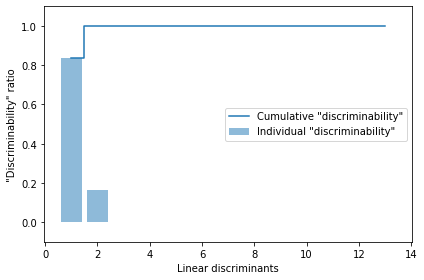

In [0]:
# plot the linear discriminants
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='Individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [0]:
# create transformation matrix W
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.3071  0.2186]
 [ 0.0098  0.1856]
 [-0.1691  0.2652]
 [ 0.2694 -0.1504]
 [-0.0499  0.0527]
 [ 0.2026  0.0653]
 [-0.5126 -0.724 ]
 [-0.0695 -0.0435]
 [ 0.0412 -0.0697]
 [ 0.1608  0.37  ]
 [ 0.0915 -0.2374]
 [-0.3128 -0.2334]
 [-0.5996  0.1977]]


<br>
<br>

## <img src="https://img.icons8.com/color/24/000000/7.png"/> Projecting examples onto the new feature space

Transform the training dataset by multiplying the matrices:

$$\mathbf{X'} = \mathbf{X W}$$

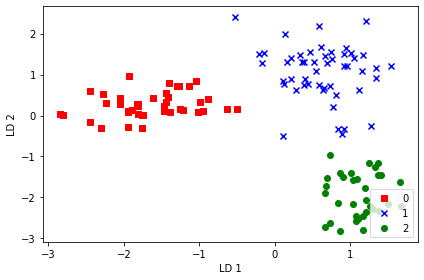

In [0]:
# project the examples
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

<br>
<br>

## <img src="https://img.icons8.com/color/32/000000/test-tube.png"/>  LDA via `scikit-learn`

In [0]:
# train LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

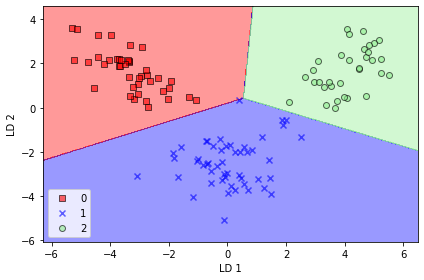

In [0]:
# plot train lda
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

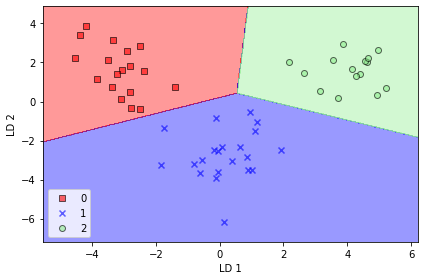

In [0]:
# plot test lda
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# <img src="https://img.icons8.com/color/32/000000/float.png"/> Nonlinear mappings

![alt text](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch05/images/05_11.png?raw=true)

<br>
<br>

## <img src="https://img.icons8.com/color/32/000000/corn.png"/> Implementing kernel-PCA

Recall the kernel trick from Lecture 08 - Support Vector Machines.  We use this to tackle non-linear problems by projecting them onto a new feature space of higher dimensionality where the classes become linear separable.

$$ \phi = {\rm I\!R}^d \rightarrow {\rm I\!R}^k  \ \ \ (k >> d)$$

In [0]:
# pca with rbf kernel
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_examples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return

    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_examples, k_features]
       Projected dataset   

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Collect the top k eigenvectors (projected examples)
    X_pc = np.column_stack([eigvecs[:, i]
                            for i in range(n_components)])

    return X_pc

<br>

### <img src="https://img.icons8.com/color/32/000000/moon-symbol.png"/>  Example 1: Separating half-moon shapes

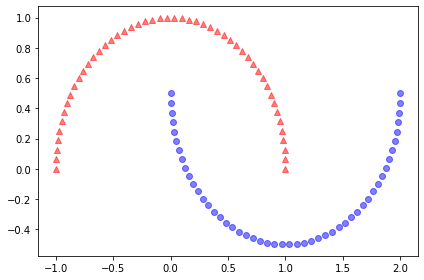

In [0]:
# make moon data
X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
plt.show()

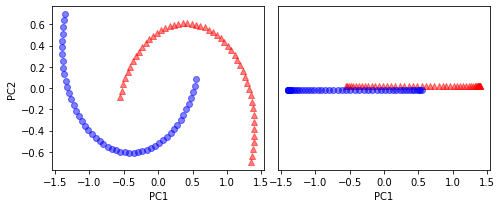

In [0]:
# perform PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


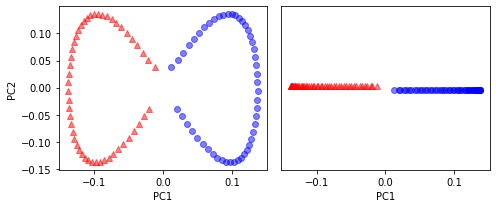

In [0]:
# perform k-PCA
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

<br>

### <img src="https://img.icons8.com/color/32/000000/final-state--v1.png"/> Example 2: Separating concentric circles

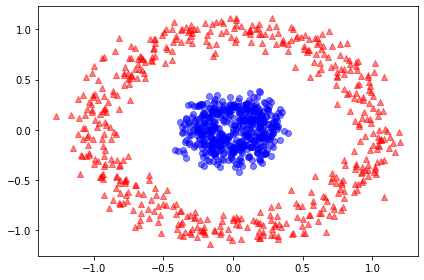

In [0]:
# make circle data
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
plt.show()

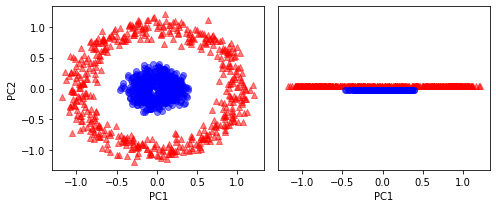

In [0]:
# perform PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


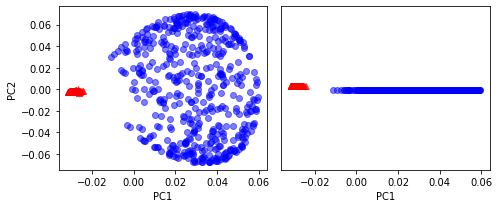

In [0]:
# perform k-PCA
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

<br>
<br>

## Projecting new data points

In [0]:
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA implementation.

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_examples, n_features]
        
    gamma: float
      Tuning parameter of the RBF kernel
        
    n_components: int
      Number of principal components to return

    Returns
    ------------
     alphas: {NumPy ndarray}, shape = [n_examples, k_features]
       Projected dataset 
     
     lambdas: list
       Eigenvalues

    """
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)

    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # scipy.linalg.eigh returns them in ascending order
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]

    # Collect the top k eigenvectors (projected examples)
    alphas = np.column_stack([eigvecs[:, i]
                              for i in range(n_components)])

    # Collect the corresponding eigenvalues
    lambdas = [eigvals[i] for i in range(n_components)]

    return alphas, lambdas

In [0]:
# make moons dataset
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


In [0]:
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [0]:
x_proj = alphas[25] # original projection
x_proj

array([0.0788])

In [0]:
# project on new subspace
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

# projection of the "new" datapoint
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj 

array([0.0788])

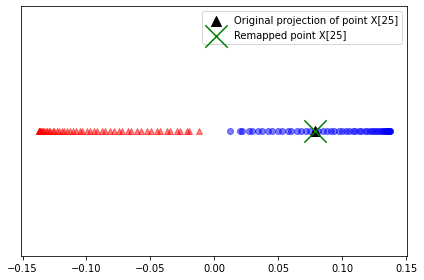

In [0]:
# visualize the first PC
plt.scatter(alphas[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='Original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='Remapped point X[25]', marker='x', s=500)
plt.yticks([], [])
plt.legend(scatterpoints=1)

plt.tight_layout()
plt.show()

## <img src="https://img.icons8.com/color/32/000000/test-tube.png"/>  Kernel principal component analysis in scikit-learn

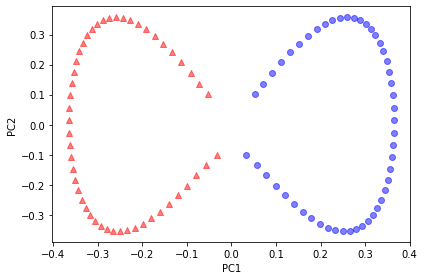

In [0]:
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

<br>
<br>